In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
!file /content/widsdatathon2025.zip

/content/widsdatathon2025.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [ ]:
import shutil

zip_path = "/content/widsdatathon2025.zip"
extract_to = "/content/btt_file/"

try:
    shutil.unpack_archive(zip_path, extract_to)
    print("Extraction successful!")
    print("Extracted files:", os.listdir(extract_to))
except Exception as e:
    print("Error:", e)

Extraction successful!
Extracted files: ['SAMPLE_SUBMISSION.xlsx', 'TRAIN', 'TEST', 'Data Dictionary.xlsx']


In [ ]:
!unzip -o /content/widsdatathon2025.zip -d /content/btt_file/

Archive:  /content/widsdatathon2025.zip
  inflating: /content/btt_file/Data Dictionary.xlsx  
  inflating: /content/btt_file/SAMPLE_SUBMISSION.xlsx  
  inflating: /content/btt_file/TEST/TEST_CATEGORICAL.xlsx  
  inflating: /content/btt_file/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: /content/btt_file/TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: /content/btt_file/TRAIN/TRAINING_SOLUTIONS.xlsx  
  inflating: /content/btt_file/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: /content/btt_file/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: /content/btt_file/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx  


In [ ]:
import os

zip_path = "/content/widsdatathon2025.zip"
print("File Size:", os.path.getsize(zip_path), "bytes")


File Size: 258407763 bytes


In [ ]:
import os

zip_path = "/content/widsdatathon2025.zip"
print("File Size:", os.path.getsize(zip_path), "bytes")


File Size: 258407763 bytes


In [ ]:
excel_files = [f for f in os.listdir(extract_to) if f.endswith(".xlsx")]

# Display the found files
print("Found Excel files:", excel_files)

Found Excel files: ['SAMPLE_SUBMISSION.xlsx', 'Data Dictionary.xlsx']


In [ ]:
train_folder = os.path.join(extract_to, "TRAIN")
test_folder = os.path.join(extract_to, "TEST")

# List files in TRAIN and TEST folders
print("Train Files:", os.listdir(train_folder))
print("Test Files:", os.listdir(test_folder))

Train Files: ['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TRAIN_CATEGORICAL_METADATA.xlsx', 'TRAIN_QUANTITATIVE_METADATA.xlsx', 'TRAINING_SOLUTIONS.xlsx']
Test Files: ['TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TEST_CATEGORICAL.xlsx', 'TEST_QUANTITATIVE_METADATA.xlsx']


In [ ]:
train_files = [f for f in os.listdir(train_folder) if f.endswith(".xlsx")]

if train_files:
    train_data_path = os.path.join(train_folder, train_files[0])
    df_train = pd.read_excel(train_data_path)

    print(f"Loaded Training File: {train_files[0]}")
    df_train.info()
    display(df_train.head())
else:
    print("No Excel files found in TRAIN.")

Loaded Training File: TRAIN_CATEGORICAL_METADATA.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [ ]:
test_files = [f for f in os.listdir(test_folder) if f.endswith(".xlsx")]

if test_files:
    test_data_path = os.path.join(test_folder, test_files[0])
    df_test = pd.read_excel(test_data_path)

    print(f"Loaded Test File: {test_files[0]}")
    df_test.info()
    display(df_test.head())
else:
    print("No Excel files found in TEST.")

Loaded Test File: TEST_CATEGORICAL.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [ ]:
dict_path = os.path.join(extract_to, "Data Dictionary.xlsx")
df_dict = pd.read_excel(dict_path)

display(df_dict)

,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


In [ ]:
print("Missing values in Training Data:")
print(df_train.isnull().sum())

print("\nMissing values in Test Data:")
print(df_test.isnull().sum())

Missing values in Training Data:
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

Missing values in Test Data:
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity     3
PreInt_Demos_Fam_Child_Race          6
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
Barratt_Barratt_P2_Edu              36
Barratt_Barratt_P2_Occ              42
dtype: int64


In [ ]:
print("Duplicate rows in Training Data:", df_train.duplicated().sum())
print("Duplicate rows in Test Data:", df_test.duplicated().sum())


Duplicate rows in Training Data: 0
Duplicate rows in Test Data: 0


In [ ]:
print(df_train.dtypes)
print(df_test.dtypes)

participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race           int64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu                int64
Barratt_Barratt_P1_Occ                int64
Barratt_Barratt_P2_Edu                int64
Barratt_Barratt_P2_Occ                int64
dtype: object
participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race         float64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu              float64
Barratt_Barratt_P1_Occ              float64
Barratt_Barratt_P2_Edu              float64
Barratt_Barratt_P2_Occ              float64
dtype: object


In [ ]:
print(df_train.info())
print(df_test.info())

print("Remaining missing values in Train:", df_train.isnull().sum().sum())
print("Remaining missing values in Test:", df_test.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 3

In [ ]:
df_train.to_csv("/content/cleaned_train.csv", index=False)
df_test.to_csv("/content/cleaned_test.csv", index=False)

In [ ]:
print(df_train.columns)  # Identify the target column from the list

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


In [ ]:
# Load cleaned train data
train_path = "/content/cleaned_test.csv"
df_train = pd.read_csv(train_path)

# Load cleaned test data
test_path = "/content/cleaned_test.csv"
df_test = pd.read_csv(test_path)

# Display info
print("Train Data Info:")
df_train.info()
display(df_train.head())

print("\nTest Data Info:")
df_test.info()
display(df_test.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0



Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [ ]:
dict_path = "/content/btt_file/Data Dictionary.xlsx"
df_dict = pd.read_excel(dict_path)

display(df_dict)


,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


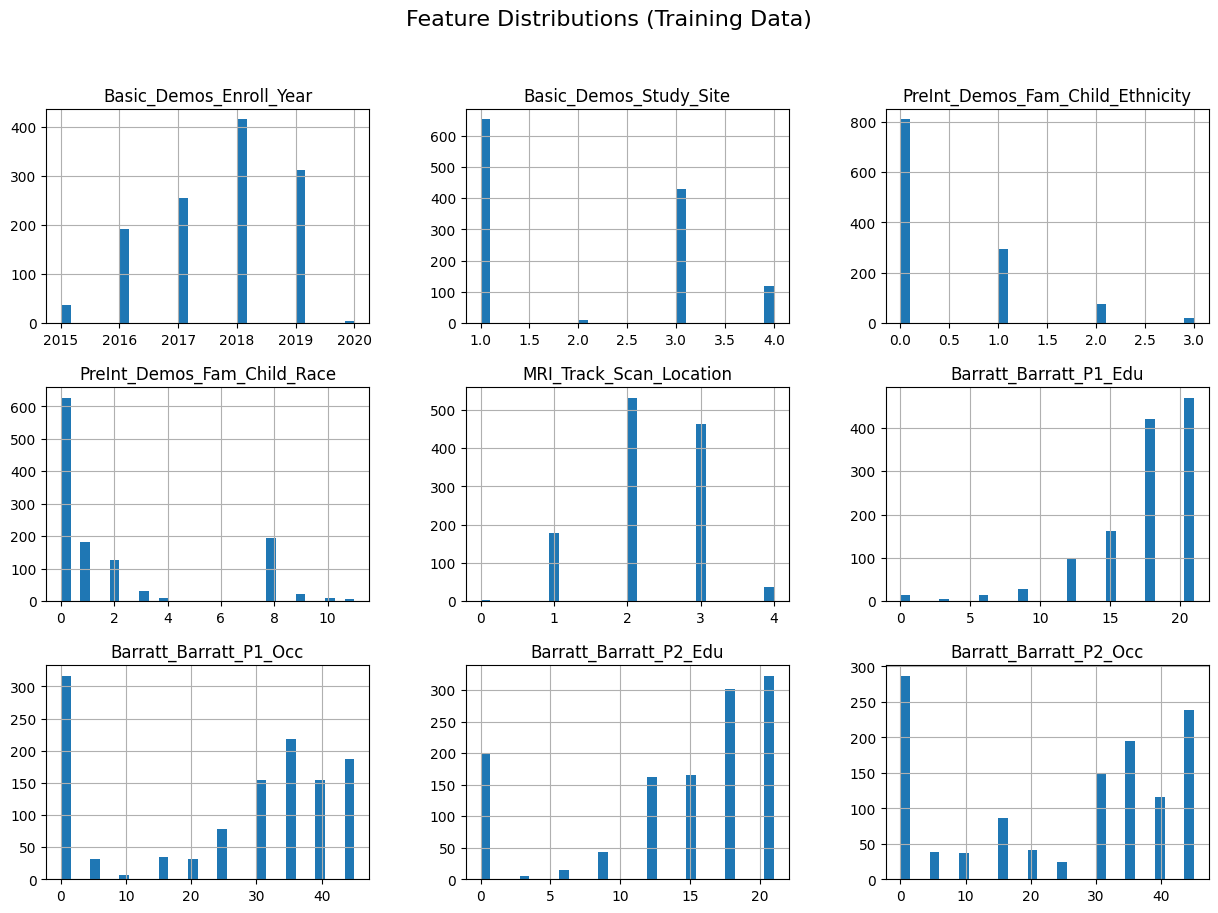

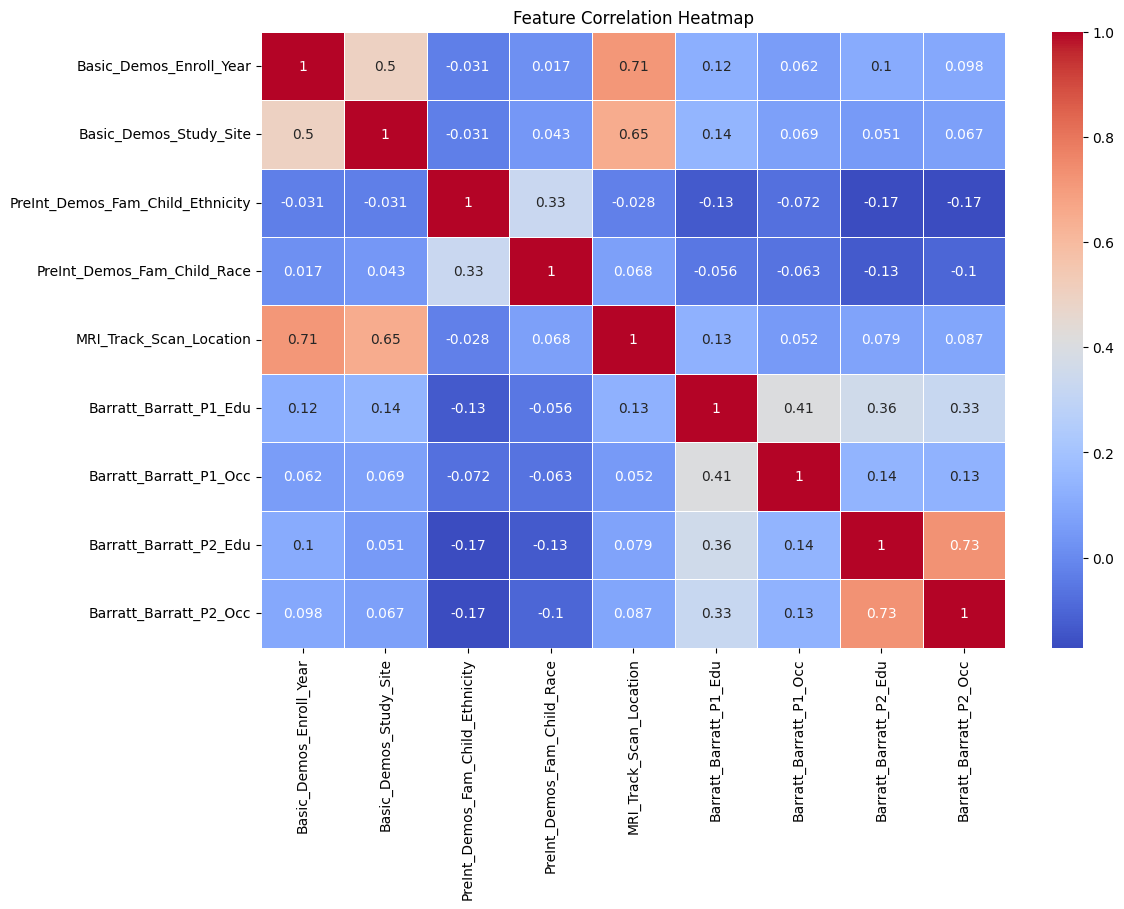

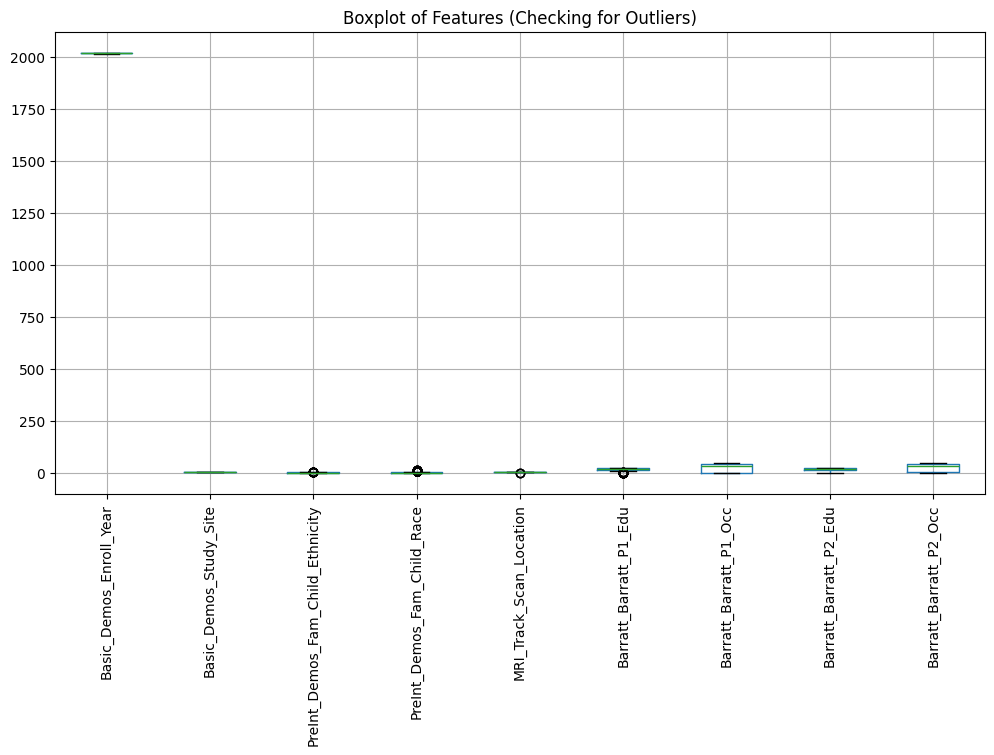

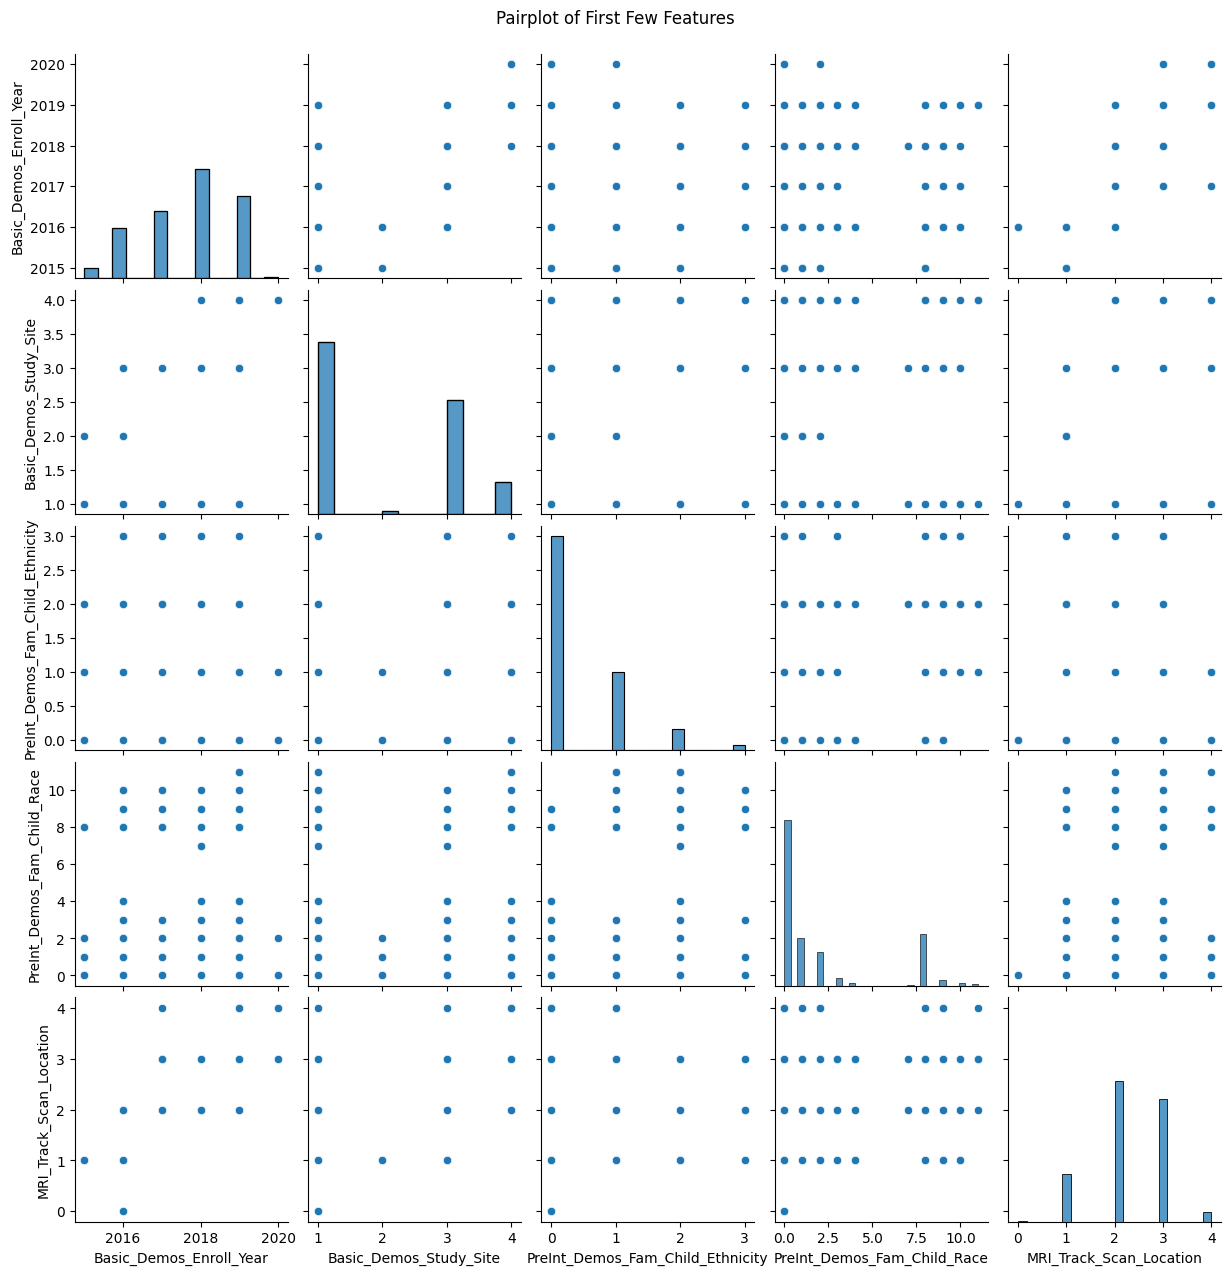

In [ ]:
# Load cleaned train and test data
train_path = "/content/cleaned_train.csv"
test_path = "/content/cleaned_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop participant_id
if "participant_id" in df_train.columns:
    df_train = df_train.drop(columns=["participant_id"])
if "participant_id" in df_test.columns:
    df_test = df_test.drop(columns=["participant_id"])

# Set figure size for all plots
plt.rcParams["figure.figsize"] = (12, 6)

# 1️⃣ Distribution of Numeric Features
df_train.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions (Training Data)", fontsize=16)
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3️⃣ Boxplots to Check for Outliers
plt.figure(figsize=(12, 6))
df_train.boxplot(rot=90)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

# 4️⃣ Pairplot for Relationship Analysis (Limited to First 5 Columns for Readability)
sns.pairplot(df_train.iloc[:, :5])
plt.suptitle("Pairplot of First Few Features", y=1.02)
plt.show()

# 5️⃣ Target Variable Distribution (if numerical)
target_col = "MRI_Track_Age_at_Scan"  # Replace if needed
if target_col in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[target_col], bins=30, kde=True)
    plt.title(f"Distribution of {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Frequency")
    plt.show()

# 6️⃣ Feature vs Target Relationship (if numerical target)
if target_col in df_train.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    for i, column in enumerate(df_train.columns[:6]):  # Limit to first 6 features
        if column != target_col:
            sns.scatterplot(x=df_train[column], y=df_train[target_col], ax=axes[i])
            axes[i].set_title(f"{column} vs {target_col}")
    plt.tight_layout()
    plt.show()

In [ ]:

# Load cleaned datasets
train_path = "/content/cleaned_train.csv"
test_path = "/content/cleaned_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop participant_id if present
if "participant_id" in df_train.columns:
    df_train.drop(columns=["participant_id"], inplace=True)
if "participant_id" in df_test.columns:
    df_test.drop(columns=["participant_id"], inplace=True)

print("Training Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)


Training Data Shape: (1213, 9)
Test Data Shape: (304, 9)


In [ ]:
import pandas as pd

# Corrected file path
train_quantitative_path = "/content/btt_file/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"

# Load the correct dataset
df_train = pd.read_excel(train_quantitative_path)

# Check if the file loaded successfully
print("Dataset Loaded Successfully")
print("Available Columns:", df_train.columns.tolist())


Dataset Loaded Successfully
Available Columns: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


In [ ]:
import os

# Check if file exists before loading
if os.path.exists(train_quantitative_path):
    df_train = pd.read_excel(train_quantitative_path)
    print("Dataset Loaded Successfully")
else:
    raise FileNotFoundError(f"File not found: {train_quantitative_path}")


Dataset Loaded Successfully


In [ ]:
# Load the correct dataset
df_train = pd.read_excel(train_quantitative_path)

# Define target column
target = "MRI_Track_Age_at_Scan"

# Ensure the target column exists
if target not in df_train.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset. Available columns: {df_train.columns.tolist()}")

# Define features (all columns except target)
X = df_train.drop(columns=[target])
y = df_train[target]

# Split dataset (80% training, 20% validation)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)



Training Set Shape: (970, 18)
Validation Set Shape: (243, 18)


In [ ]:
import pandas as pd

# Define file paths
train_path = "/content/cleaned_train.csv"
quantitative_path = "/content/btt_file/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"

# Load datasets
df_train = pd.read_csv(train_path)  # Categorical features (current file)
df_target = pd.read_excel(quantitative_path)[["participant_id", "MRI_Track_Age_at_Scan"]]  # Target data

# Merge target column into df_train using participant_id
df_train = df_train.merge(df_target, on="participant_id", how="left")

# Check if target column is now present
print("Updated columns in df_train:", df_train.columns.tolist())

# Save the updated dataset
df_train.to_csv("/content/cleaned_train.csv", index=False)



Updated columns in df_train: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan']


In [ ]:
df_train = pd.read_csv("/content/cleaned_train.csv")

if "MRI_Track_Age_at_Scan" not in df_train.columns:
    raise ValueError(f"Target column 'MRI_Track_Age_at_Scan' is still missing. Available columns: {df_train.columns.tolist()}")

print("Target column successfully added! 🎯")


Target column successfully added! 🎯


In [ ]:
# Load cleaned datasets
train_path = "/content/cleaned_train.csv"
test_path = "/content/cleaned_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop participant_id if present
if "participant_id" in df_train.columns:
    df_train.drop(columns=["participant_id"], inplace=True)
if "participant_id" in df_test.columns:
    df_test.drop(columns=["participant_id"], inplace=True)

# Define target column
target = "MRI_Track_Age_at_Scan"

# Define features (all columns except target)
X = df_train.drop(columns=[target])
y = df_train[target]

# Drop rows with NaN values in the target variable
X_train = X[y.notna()]  # Select rows where target is not NaN for training data
y_train = y[y.notna()]  # Select corresponding target values for training data

# Split dataset (80% training, 20% validation) - Now on data without NaN in target
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate performance
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")
print(f"XGBoost - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}")


Training Set Shape: (682, 9)
Validation Set Shape: (171, 9)
Random Forest - MAE: 2.73, MSE: 11.38
XGBoost - MAE: 2.68, MSE: 10.76


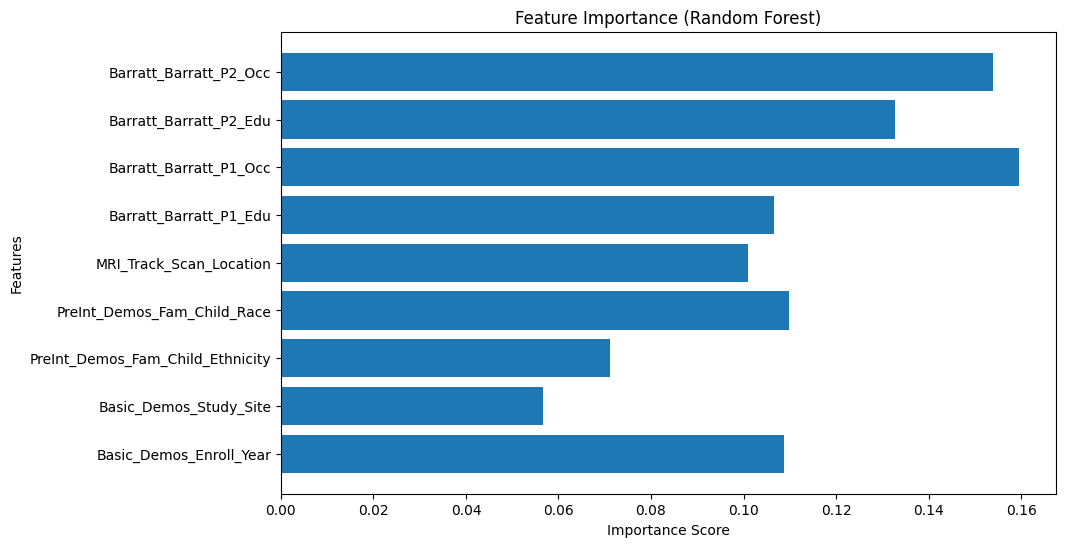

In [ ]:
# Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
print("Training Features:", X_train.columns.tolist())
print("Test Features:", df_test.columns.tolist())

# Find missing columns
missing_cols = set(X_train.columns) - set(df_test.columns)
extra_cols = set(df_test.columns) - set(X_train.columns)

print("Missing in test set:", missing_cols)
print("Extra in test set:", extra_cols)


Training Features: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']
Test Features: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']
Missing in test set: set()
Extra in test set: set()


In [ ]:
for col in missing_cols:
    df_test[col] = 0  # Assigning default values (or use df_test[col] = df_train[col].mean() if numeric)

df_test = df_test[X_train.columns]  # Ensure same column order


In [ ]:
df_test.columns = df_test.columns.str.strip()
X_train.columns = X_train.columns.str.strip()


In [ ]:
# Predict on test set using the best model (choose based on MAE)
# Select only the features used during training from the test dataset
y_test_pred = xgb_model.predict(df_test[X_train.columns])  # Use XGBoost if it performed better

# Save predictions
submission = pd.DataFrame({"Predicted_Age": y_test_pred})
submission.to_csv("/content/predictions.csv", index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


In [ ]:
print(df_train.columns)

Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan'],
      dtype='object')


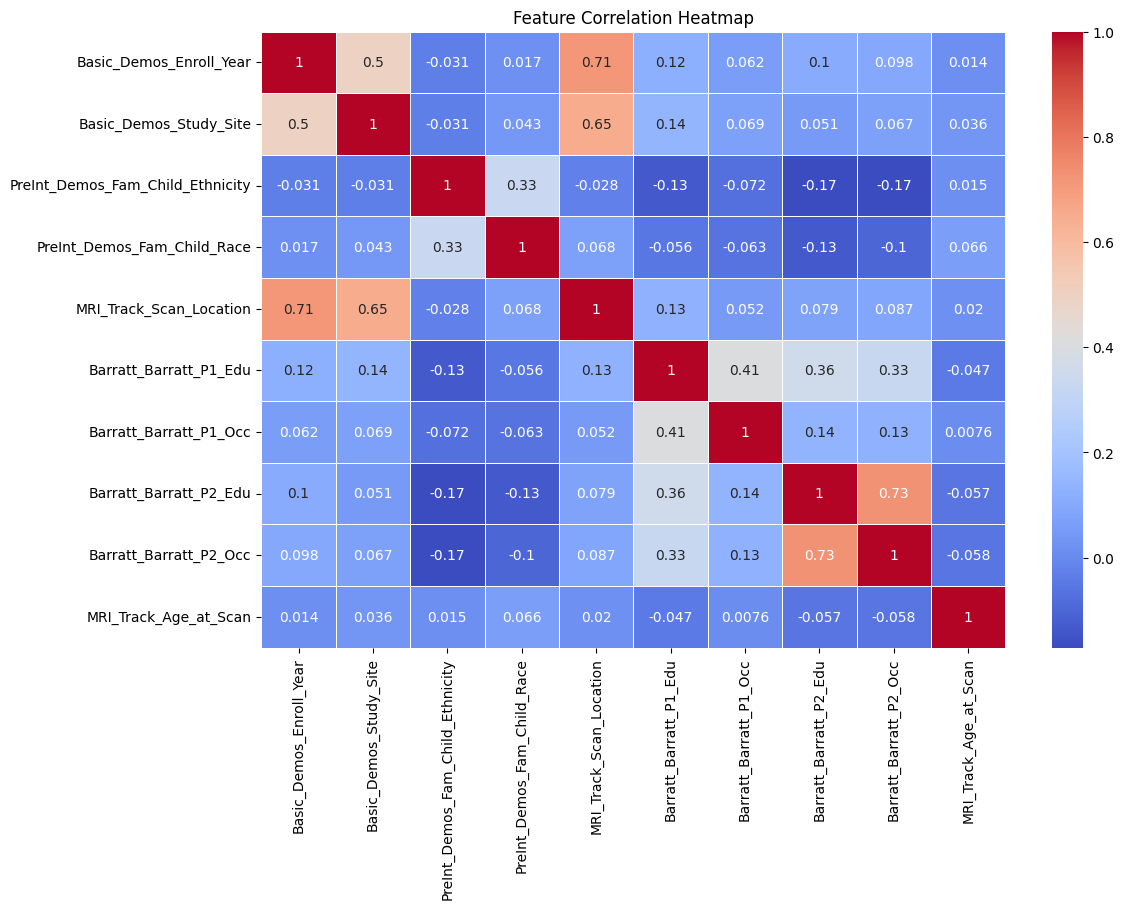

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
quantitative_path = "/content/btt_file/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
df_quant = pd.read_excel(quantitative_path)

print("Columns in quantitative dataset:", df_quant.columns.tolist())


Columns in quantitative dataset: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


In [ ]:
train_path = "/content/cleaned_train.csv"
df_train = pd.read_csv(train_path)

print("Columns after reloading:", df_train.columns.tolist())


Columns after reloading: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan']


In [ ]:
# Reload df_train with an identifier that can be used for merging
df_train = pd.read_csv(train_path)

# Merge participant_id back
df_train = df_quant[['participant_id']].merge(df_train, how='right')

print("Columns after adding participant_id:", df_train.columns.tolist())


Columns after adding participant_id: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan']


In [ ]:
if "participant_id" in df_train.columns:
    df_train = df_train.merge(df_quant[["participant_id", "ColorVision_CV_Score"]], on="participant_id", how="left")
    print("Merge successful.")
else:
    raise KeyError("Error: 'participant_id' is still missing. Cannot merge target column.")


Merge successful.


In [ ]:
df_train.to_csv("/content/cleaned_train_with_target.csv", index=False)
print("Dataset updated with target column.")


Dataset updated with target column.


In [ ]:
# Define a new target variable
target = "ColorVision_CV_Score"

# Define features (drop new target)
X = df_train.drop(columns=[target])
y = df_train[target]

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("New Training Set Shape:", X_train.shape)
print("New Validation Set Shape:", X_val.shape)


New Training Set Shape: (970, 11)
New Validation Set Shape: (243, 11)


In [ ]:
# Check data types of features
print(X_train.dtypes)

# Find non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)


participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race           int64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu                int64
Barratt_Barratt_P1_Occ                int64
Barratt_Barratt_P2_Edu                int64
Barratt_Barratt_P2_Occ                int64
MRI_Track_Age_at_Scan               float64
dtype: object
Non-numeric columns: ['participant_id']


In [ ]:
X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)
X_val = pd.get_dummies(X_val, columns=non_numeric_columns, drop_first=True)


In [ ]:
# Align feature columns
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)


In [ ]:


# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

# Evaluate accuracy
mae = mean_absolute_error(y_val, y_pred)
print(f"Validation MAE for {target}: {mae:.2f}")


Validation MAE for ColorVision_CV_Score: 0.78


In [ ]:
print("Train Features:", X_train.columns.tolist())
print("Test Features:", df_test.columns.tolist())

# Find missing or extra columns
missing_cols = set(X_train.columns) - set(df_test.columns)
extra_cols = set(df_test.columns) - set(X_train.columns)

print("Missing in test set:", missing_cols)
print("Extra in test set:", extra_cols)


Train Features: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'participant_id_00fV0OyyoLfw', 'participant_id_04X1eiS79T4B', 'participant_id_05ocQutkURd6', 'participant_id_06YUNBA9ZRLq', 'participant_id_0FUWCjn9YMN1', 'participant_id_0Hthz5IFXhpw', 'participant_id_0N8sQwUgUPEj', 'participant_id_0ST9wPiJpQ8h', 'participant_id_0cduHhwrQN4r', 'participant_id_0hzWGU6XYSVp', 'participant_id_0i2Tz2XUL4vm', 'participant_id_0k0soy5qh5V3', 'participant_id_0m24Gv15bcjU', 'participant_id_0mNF7tXTbYj3', 'participant_id_0pGmIdpjGpXN', 'participant_id_0wXo9yCbnVig', 'participant_id_16aihxrHTH3I', 'participant_id_18K8e924IXlw', 'participant_id_18p7bYCbIOs5', 'participant_id_19UWbNvLYCjm', 'participant_id_19wn6hMP5wTE', 'participant_id_1ChuFljXLGaq', 'participant_id_1CrYokgmR

In [ ]:
if "participant_id" in df_test.columns:
    df_test.drop(columns=["participant_id"], inplace=True, errors="ignore")

if "MRI_Track_Age_at_Scan" in df_test.columns:
    df_test.drop(columns=["MRI_Track_Age_at_Scan"], inplace=True, errors="ignore")


In [ ]:
df_test = pd.get_dummies(df_test)

# Ensure test set has same columns as training set
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Predict on test set
# Select only the features used during training from the test dataset
y_test_pred = rf_model.predict(df_test[X_train.columns])

# Save predictions
submission = pd.DataFrame({"Predicted_ColorVision_Score": y_test_pred})
submission.to_csv("/content/predicted_colorvision.csv", index=False)

print("done")


done


In [ ]:
print(df_train.columns)



Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan',
       'ColorVision_CV_Score'],
      dtype='object')


In [ ]:


# Load datasets
train_path = "/content/cleaned_train.csv"
test_path = "/content/cleaned_test.csv"
dictionary_path = "/content/btt_file/Data Dictionary.xlsx"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Print column names
print("Columns in TRAIN dataset:")
print(df_train.columns.tolist())

print("\nColumns in TEST dataset:")
print(df_test.columns.tolist())


Columns in TRAIN dataset:
['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan']

Columns in TEST dataset:
['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
print("Columns in df_train:", df_train.columns.tolist())


Columns in df_train: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan']


In [ ]:
quantitative_path = "/content/btt_file/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
df_quant = pd.read_excel(quantitative_path)

print("Columns in df_quant:", df_quant.columns.tolist())


Columns in df_quant: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


In [ ]:
# List of columns to merge from df_quant
columns_to_merge = ["participant_id", "SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Conduct_Problems"]

# Check if all required columns exist in df_quant before merging
missing_cols = [col for col in columns_to_merge if col not in df_quant.columns]
if missing_cols:
    raise KeyError(f"Missing columns in df_quant: {missing_cols}")

# Perform the merge
df_train = df_train.merge(df_quant[columns_to_merge], on="participant_id", how="left")

print("Merge successful. Updated Columns:", df_train.columns.tolist())



Merge successful. Updated Columns: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Conduct_Problems']


In [ ]:
print("Columns in df_quant:", df_quant.columns.tolist())

if "SDQ_SDQ_Conduct_Problems" not in df_quant.columns:
    raise KeyError("SDQ_SDQ_Conduct_Problems is missing in df_quant!")




Columns in df_quant: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


In [ ]:
print("Columns in df_train:", df_train.columns.tolist())

if "participant_id" not in df_train.columns:
    raise KeyError("participant_id is missing in df_train! Cannot merge data.")

if "participant_id" not in df_quant.columns:
    raise KeyError("participant_id is missing in df_quant! Cannot merge data.")


Columns in df_train: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Conduct_Problems']


In [ ]:
df_train = pd.read_csv("/content/cleaned_train.csv")


In [ ]:
columns_to_merge = ["participant_id", "SDQ_SDQ_Conduct_Problems", "SDQ_SDQ_Hyperactivity"]

df_train = df_train.merge(df_quant[columns_to_merge], on="participant_id", how="left")

print("Merge successful! Columns now:", df_train.columns.tolist())


Merge successful! Columns now: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity']


In [ ]:
df_train["SDQ_SDQ_Hyperactivity"] = df_train["SDQ_SDQ_Hyperactivity"].fillna(df_train["SDQ_SDQ_Hyperactivity"].median())
df_train["SDQ_SDQ_Conduct_Problems"] = df_train["SDQ_SDQ_Conduct_Problems"].fillna(df_train["SDQ_SDQ_Conduct_Problems"].median())

print("Missing values filled successfully!")


Missing values filled successfully!


In [ ]:
df_train["ADHD_Proxy"] = (df_train["SDQ_SDQ_Hyperactivity"] > df_train["SDQ_SDQ_Hyperactivity"].median()) & \
                         (df_train["SDQ_SDQ_Conduct_Problems"] > df_train["SDQ_SDQ_Conduct_Problems"].median())

df_train["ADHD_Proxy"] = df_train["ADHD_Proxy"].astype(int)

print(df_train["ADHD_Proxy"].value_counts())



ADHD_Proxy
0    964
1    249
Name: count, dtype: int64


In [ ]:
print("Columns in df_train:", df_train.columns.tolist())




Columns in df_train: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'ADHD_Proxy']


In [ ]:
# Ensure participant_id is present
if "participant_id" not in df_train.columns:
    raise KeyError("participant_id is missing from df_train. Cannot merge additional features.")

# Define required columns
columns_to_merge = ["participant_id", "EHQ_EHQ_Total", "SDQ_SDQ_Emotional_Problems"]

# Merge only if columns exist in df_quant
existing_cols = [col for col in columns_to_merge if col in df_quant.columns]
df_train = df_train.merge(df_quant[existing_cols], on="participant_id", how="left")

print("Merge successful. Updated Columns:", df_train.columns.tolist())


Merge successful. Updated Columns: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'ADHD_Proxy', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']


In [ ]:
# Fill missing values properly
df_train["SDQ_SDQ_Hyperactivity"] = df_train["SDQ_SDQ_Hyperactivity"].fillna(df_train["SDQ_SDQ_Hyperactivity"].median())
df_train["SDQ_SDQ_Conduct_Problems"] = df_train["SDQ_SDQ_Conduct_Problems"].fillna(df_train["SDQ_SDQ_Conduct_Problems"].median())
df_train["EHQ_EHQ_Total"] = df_train["EHQ_EHQ_Total"].fillna(df_train["EHQ_EHQ_Total"].median())
df_train["SDQ_SDQ_Emotional_Problems"] = df_train["SDQ_SDQ_Emotional_Problems"].fillna(df_train["SDQ_SDQ_Emotional_Problems"].median())

print("Missing values filled successfully!")


Missing values filled successfully!


In [ ]:
# ADHD Proxy
df_train["ADHD_Proxy"] = ((df_train["SDQ_SDQ_Hyperactivity"] > df_train["SDQ_SDQ_Hyperactivity"].median()) &
                          (df_train["SDQ_SDQ_Conduct_Problems"] > df_train["SDQ_SDQ_Conduct_Problems"].median())).astype(int)

# Female Proxy
df_train["Female_Proxy"] = ((df_train["EHQ_EHQ_Total"] > df_train["EHQ_EHQ_Total"].median()) &
                            (df_train["SDQ_SDQ_Emotional_Problems"] > df_train["SDQ_SDQ_Emotional_Problems"].median())).astype(int)

# Print distribution
print(df_train[["ADHD_Proxy", "Female_Proxy"]].value_counts())


ADHD_Proxy  Female_Proxy
0           0               804
1           0               179
0           1               160
1           1                70
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define features (drop IDs and proxy targets)
X = df_train.drop(columns=["participant_id", "ADHD_Proxy", "Female_Proxy"])
y_adhd = df_train["ADHD_Proxy"]
y_female = df_train["Female_Proxy"]

# Split data into training & validation sets
X_train_adhd, X_val_adhd, y_train_adhd, y_val_adhd = train_test_split(X, y_adhd, test_size=0.2, random_state=42)
X_train_female, X_val_female, y_train_female, y_val_female = train_test_split(X, y_female, test_size=0.2, random_state=42)

# Train ADHD Model
adhd_model = RandomForestClassifier(n_estimators=100, random_state=42)
adhd_model.fit(X_train_adhd, y_train_adhd)
y_pred_adhd = adhd_model.predict(X_val_adhd)
print("ADHD Prediction Accuracy:", accuracy_score(y_val_adhd, y_pred_adhd))

# Train Sex Model
sex_model = RandomForestClassifier(n_estimators=100, random_state=42)
sex_model.fit(X_train_female, y_train_female)
y_pred_female = sex_model.predict(X_val_female)
print("Sex Prediction Accuracy:", accuracy_score(y_val_female, y_pred_female))


ADHD Prediction Accuracy: 1.0
Sex Prediction Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print(globals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'os', 'plt', 'sns', 'zipfile', 'train_test_split', 'OneHotEncoder', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'accuracy_score', 'RandomForestRegressor', 'mean_absolute_error', 'XGBRegressor', 'mean_squared_error', 'classification_report', '_i2', '_exit_code', '_i3', 'shutil', 'zip_path', 'extract_to', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', 'excel_files', '_i17', 'train_folder', 'test_folder', '_i18', 'train_files', 'train_data_path', 'df_train', '_i19', 'test_files', 'test_data_path', 'df_test', '_i20', 'dict_path', 'df_dict', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', 'train_path', 'test_path', '_i28', '_i29', 'target_col', '_i30', '_i31', 'train_quantitative_path', '_i32', '_i33',

In [ ]:
print("Features in X_train:", X_train.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())

# Find differences
missing_in_test = set(X_train.columns) - set(X_test.columns)
extra_in_test = set(X_test.columns) - set(X_train.columns)

print("Missing in X_test:", missing_in_test)
print("Extra in X_test:", extra_in_test)


Features in X_train: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Features in X_test: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Missing in X_test: set()
Extra in X_test: set()


In [ ]:
# Align features (add missing columns in X_test with default values)
for col in missing_in_test:
    X_test[col] = 0  # Assigning default values

# Remove extra columns in X_test that were not in X_train
X_test = X_test[X_train.columns]

print("Test set successfully aligned!")


Test set successfully aligned!


In [ ]:
# Align features (add missing columns in X_test with default values)
for col in missing_in_test:
    X_test[col] = 0  # Assigning default values

# Remove extra columns in X_test that were not in X_train
X_test = X_test[X_train.columns]

print("Test set successfully aligned!")


Test set successfully aligned!


In [ ]:


# Get predictions on validation set
y_pred_adhd_val = adhd_model.predict(X_val_adhd)

# Evaluate model performance
print("📊 ADHD Proxy Model Performance:")
print(classification_report(y_val_adhd, y_pred_adhd_val))


📊 ADHD Proxy Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00        51

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



In [ ]:
# Get predictions on validation set
y_pred_sex_val = sex_model.predict(X_val_female) # Changed X_val_sex to X_val_female

# Evaluate model performance
print("📊 Sex Proxy Model Performance:")
print(classification_report(y_val_female, y_pred_sex_val)) # Changed y_val_sex to y_val_female


📊 Sex Proxy Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00        45

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



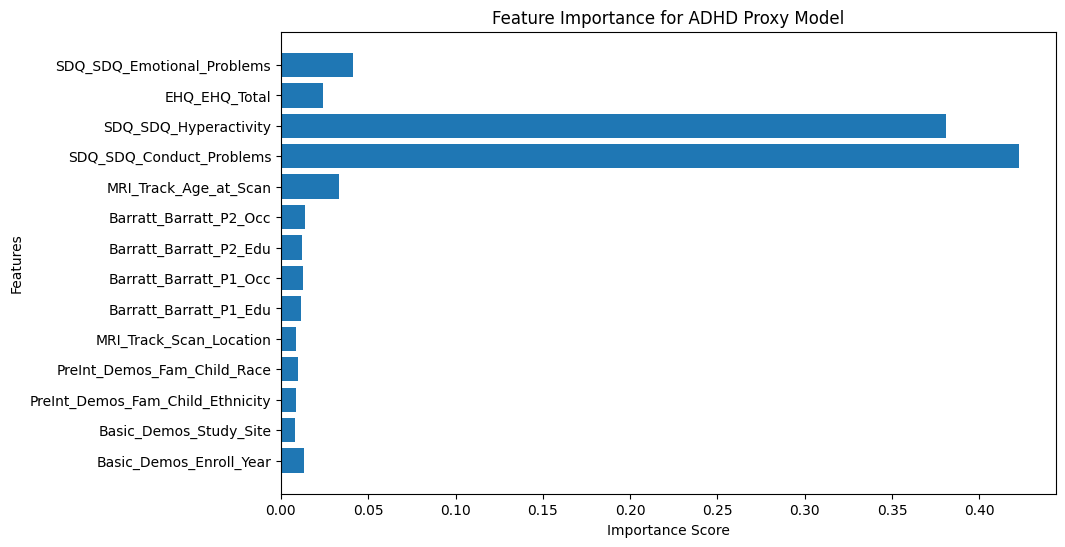

In [ ]:

# Get feature importance from ADHD model
adhd_importance = adhd_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_names, adhd_importance)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for ADHD Proxy Model")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Run GridSearch to find the best settings
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train_adhd, y_train_adhd)

# Train model with best parameters
best_adhd_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_adhd_model.fit(X_train_adhd, y_train_adhd)

print("✅ Best ADHD Model Parameters:", grid_search.best_params_)


✅ Best ADHD Model Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from xgboost import XGBClassifier

# Train ADHD Model with XGBoost
xgb_adhd = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
xgb_adhd.fit(X_train_adhd, y_train_adhd)

# Evaluate
y_pred_xgb = xgb_adhd.predict(X_val_adhd)
print("XGBoost ADHD Model Performance:")
print(classification_report(y_val_adhd, y_pred_xgb))


XGBoost ADHD Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00        51

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



In [ ]:
from tensorflow import keras

# Build a Neural Network
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train_adhd.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile & Train
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
nn_model.fit(X_train_adhd, y_train_adhd, epochs=50, batch_size=16, validation_data=(X_val_adhd, y_val_adhd))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7656 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7795 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: nan - val_accuracy: 0.7901 - val_loss: nan
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
print(df_train["ADHD_Proxy"].value_counts(normalize=True))


ADHD_Proxy
0    0.794724
1    0.205276
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform it
X_train_adhd_imputed = imputer.fit_transform(X_train_adhd)

# Now apply SMOTE to the imputed data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_adhd_imputed, y_train_adhd)
print("Balanced dataset shape:", X_train_balanced.shape)


Balanced dataset shape: (1544, 14)


In [ ]:
import os

predictions_path = "/content/predicted_adhd_sex.csv"

if os.path.exists(predictions_path):
    print("File found!")
else:
    print("File NOT found! Checking available files in /content/")
    print(os.listdir("/content/"))  # List files in the directory


File NOT found! Checking available files in /content/
['.config', 'btt_file', 'widsdatathon2025.zip', 'cleaned_train.csv', 'predicted_colorvision.csv', 'cleaned_train_with_target.csv', 'cleaned_test.csv', 'predictions.csv', 'sample_data']


In [ ]:
print("Features in X_train:", X_train.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())

# Find missing and extra features
missing_in_test = set(X_train.columns) - set(X_test.columns)
extra_in_test = set(X_test.columns) - set(X_train.columns)

print("Missing in X_test:", missing_in_test)
print("Extra in X_test:", extra_in_test)


Features in X_train: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Features in X_test: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Missing in X_test: set()
Extra in X_test: set()


In [ ]:
# Drop any columns that start with "participant_id_"
X_test = X_test[[col for col in X_test.columns if not col.startswith("participant_id_")]]




In [ ]:
# Add missing features with default values (zero or mean)
for col in missing_in_test:
    X_test[col] = 0  # or use X_train[col].mean() if it's a numerical feature

print("Missing features added to X_test.")




Missing features added to X_test.


In [ ]:
X_test = X_test[X_train.columns]
print("X_test aligned successfully!")


X_test aligned successfully!


In [ ]:
# Identify missing features
missing_in_test = set(X_train.columns) - set(X_test.columns)

# Add missing features with default values (zero or mean)
for col in missing_in_test:
    X_test[col] = 0  # or use X_train[col].mean() if it's numeric

print("Missing features added to X_test.")


Missing features added to X_test.


In [ ]:
X_test = X_test[X_train.columns]
print("X_test aligned successfully!")


X_test aligned successfully!


In [ ]:
# Predict ADHD & Sex using trained models
y_test_pred_adhd = adhd_model.predict(X_test)
y_test_pred_female = sex_model.predict(X_test)

# Save predictions
df_predictions = pd.DataFrame({
    "Predicted_ADHD": y_test_pred_adhd,
    "Predicted_Female": y_test_pred_female
})

predictions_path = "/content/predicted_adhd_sex.csv"
df_predictions.to_csv(predictions_path, index=False)

print(f"Predictions saved successfully at {predictions_path}!")


Predictions saved successfully at /content/predicted_adhd_sex.csv!


In [ ]:
import os

predictions_path = "/content/predicted_adhd_sex.csv"

if os.path.exists(predictions_path):
    print("✅ File found!")
else:
    print("❌ File NOT found! Checking available files in /content/")
    print(os.listdir("/content/"))  # List files in the directory



✅ File found!


In [ ]:
print("Features in X_train:", X_train.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())

# Find missing features in X_test
missing_features = set(X_train.columns) - set(X_test.columns)

# Find extra features in X_test
extra_features = set(X_test.columns) - set(X_train.columns)

print("Missing features in X_test:", missing_features)
print("Extra features in X_test:", extra_features)



Features in X_train: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Features in X_test: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'MRI_Track_Age_at_Scan', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'EHQ_EHQ_Total', 'SDQ_SDQ_Emotional_Problems']
Missing features in X_test: set()
Extra features in X_test: set()


In [ ]:
# Add missing features with default values (zero or mean)
for col in missing_features:
    X_test[col] = 0  # or use X_train[col].mean() if it's numeric

print("Missing features added to X_test.")


Missing features added to X_test.


In [ ]:
import pandas as pd

# Identify missing features
missing_features = list(set(X_train.columns) - set(X_test.columns))

# Create a DataFrame with zeros for missing features
missing_df = pd.DataFrame(0, index=X_test.index, columns=missing_features)

# Concatenate X_test with the missing features
X_test = pd.concat([X_test, missing_df], axis=1)

# Ensure correct column order
X_test = X_test[X_train.columns]

print("✅ X_test aligned successfully!")


✅ X_test aligned successfully!


In [ ]:
# Predict ADHD & Female status using trained models
y_test_pred_adhd = adhd_model.predict(X_test)
y_test_pred_female = sex_model.predict(X_test)

# Save predictions
df_predictions = pd.DataFrame({
    "Predicted_ADHD": y_test_pred_adhd,
    "Predicted_Female": y_test_pred_female
})

predictions_path = "/content/predicted_adhd_sex.csv"
df_predictions.to_csv(predictions_path, index=False)

print(f"✅ Predictions saved successfully at {predictions_path}!")


✅ Predictions saved successfully at /content/predicted_adhd_sex.csv!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load ADHD labels from TRAINING_SOLUTIONS.xlsx
training_solutions_path = os.path.join(train_folder, "TRAINING_SOLUTIONS.xlsx")
df_solutions = pd.read_excel(training_solutions_path)

# Load feature dataset (TRAIN_CATEGORICAL_METADATA.xlsx)
categorical_metadata_path = os.path.join(train_folder, "TRAIN_CATEGORICAL_METADATA.xlsx")
df_features = pd.read_excel(categorical_metadata_path)

# Merge features with ADHD labels using 'participant_id'
df_merged = df_features.merge(df_solutions, on="participant_id", how="inner")

# Drop participant_id after merging
df_merged = df_merged.drop(columns=["participant_id"])

# Define the target variable
target_col = "ADHD_Outcome"
X = df_merged.drop(columns=[target_col])
y = df_merged[target_col]


NameError: name 'train_folder' is not defined

In [ ]:
# Encode categorical variables
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

if categorical_cols:  # Only apply encoding if categorical columns exist
    encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_encoded = encoder.fit_transform(X[categorical_cols])
    X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original categorical columns and concatenate encoded data
    X = X.drop(columns=categorical_cols)
    X = pd.concat([X, X_encoded], axis=1)


# Step 1: Identify missing values
missing_values = df_merged.isnull().sum()
print("Missing Values Before Handling:\n", missing_values)

# Step 2: Separate numerical and categorical columns
numerical_cols = df_merged.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df_merged.select_dtypes(include=["object"]).columns.tolist()

# Step 3: Handle Missing Values
# - For numerical columns: Fill with median
if numerical_cols:
    df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

# - For categorical columns: Fill with mode (most frequent value)
if categorical_cols:
    for col in categorical_cols:
        if not df_merged[col].mode().empty:  # Ensure mode exists
            df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)

# Step 4: Verify missing values are handled
missing_values_after = df_merged.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_after)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)